In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

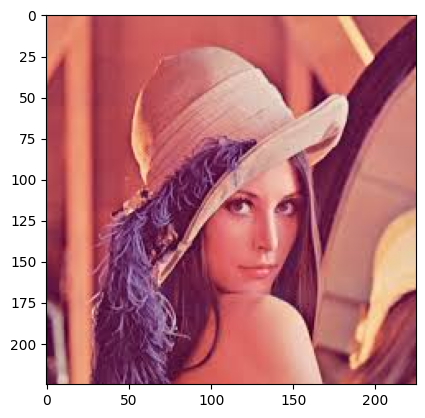

In [5]:
# NTSC formula: Y = 0.299*R + 0.587*G + 0.114*B
img = cv2.imread('images/lena.jpeg')
# show original image using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
greyscale_image = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
r_distribution = np.zeros(256, dtype=np.uint32)
g_distribution = np.zeros(256, dtype=np.uint32)
b_distribution = np.zeros(256, dtype=np.uint32)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r_distribution[img[i, j, 2]] += 1
        g_distribution[img[i, j, 1]] += 1
        b_distribution[img[i, j, 0]] += 1
        greyscale_image[i, j] = 0.299*img[i, j, 2] + 0.587*img[i, j, 1] + 0.114*img[i, j, 0]

In [23]:
one_line_greyscale_conversion = img[:, :, 2]*0.299 + img[:, :, 1]*0.587 + img[:, :, 0]*0.114

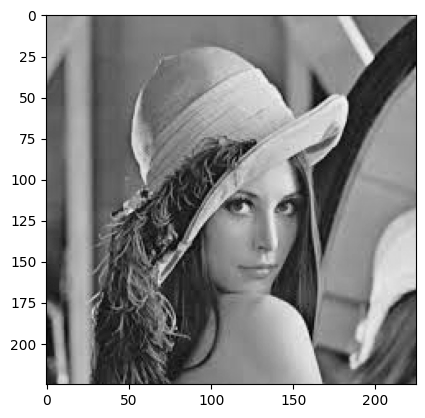

In [7]:
plt.imshow(greyscale_image, cmap='gray')
plt.show()

In [10]:
r_pdf = r_distribution / (img.shape[0]*img.shape[1])
g_pdf = g_distribution / (img.shape[0]*img.shape[1])
b_pdf = b_distribution / (img.shape[0]*img.shape[1])

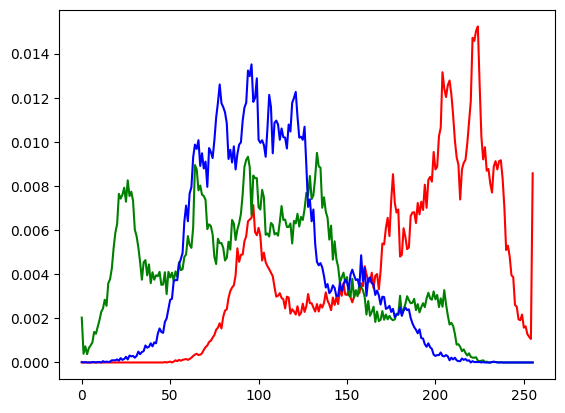

In [16]:
plt.plot(r_pdf, color='red')
plt.plot(g_pdf, color='green')
plt.plot(b_pdf, color='blue')
plt.show()

In [12]:
r_cumulative_function = r_pdf.cumsum()
g_cumulative_function = g_pdf.cumsum()
b_cumulative_function = b_pdf.cumsum()

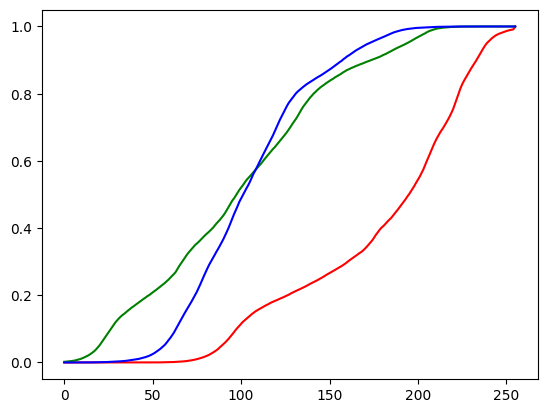

In [17]:
plt.plot(r_cumulative_function, color='red')
plt.plot(g_cumulative_function, color='green')
plt.plot(b_cumulative_function, color='blue')

In [13]:
r_mapping = (r_cumulative_function * 255).astype(np.uint8)
g_mapping = (g_cumulative_function * 255).astype(np.uint8)
b_mapping = (b_cumulative_function * 255).astype(np.uint8)

In [14]:
lena_redistributed = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lena_redistributed[i, j, 2] = r_mapping[img[i, j, 2]]
        lena_redistributed[i, j, 1] = g_mapping[img[i, j, 1]]
        lena_redistributed[i, j, 0] = b_mapping[img[i, j, 0]]

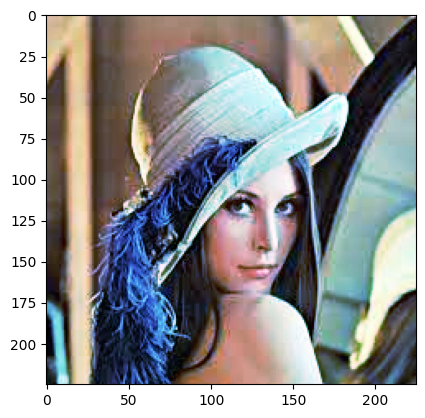

In [15]:
plt.imshow(cv2.cvtColor(lena_redistributed, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
redistributed_greyscale_image = np.zeros((lena_redistributed.shape[0], lena_redistributed.shape[1]), dtype=np.uint8)
for i in range(lena_redistributed.shape[0]):
    for j in range(lena_redistributed.shape[1]):
        redistributed_greyscale_image[i, j] = 0.299*lena_redistributed[i, j, 2] + 0.587*lena_redistributed[i, j, 1] + 0.114*lena_redistributed[i, j, 0]

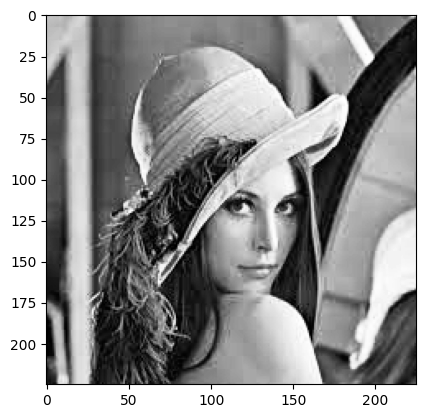

In [20]:
plt.imshow(redistributed_greyscale_image, cmap='gray')
plt.show()